<a href="https://colab.research.google.com/github/ashintha2003/MACHINE_LEARNING/blob/main/ANIMAL_RECOGNISE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== IMPORTANT ===
Please compress your 'test' folder (with all subfolders) to 'test.zip'
Then upload it when prompted below



Saving test.zip to test.zip
Found 234 files belonging to 10 classes.
Using 188 files for training.
Found 234 files belonging to 10 classes.
Using 46 files for validation.

Class names detected: ['bird', 'cat', 'crocodile', 'deer', 'dog', 'elephant', 'frog', 'horse', 'snake', 'tiger']

Starting training...
Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 173ms/step - accuracy: 0.0746 - loss: 2.4755 - val_accuracy: 0.1522 - val_loss: 2.3019
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2112 - loss: 2.2138 - val_accuracy: 0.2609 - val_loss: 2.3163
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3948 - loss: 1.8511 - val_accuracy: 0.3478 - val_loss: 2.0296
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5674 - loss: 1.4066 - val_accuracy: 0.3043 - val_loss: 2.0820
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7322 - loss: 0.9492 - val_accuracy: 0.2609 - val_loss: 2.5824
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy:

<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


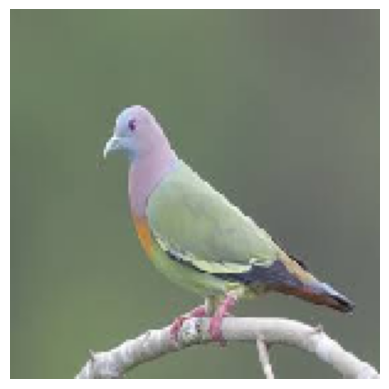

This image most likely belongs to bird with a 99.75 percent confidence.

Options:
1. Upload an image for prediction
2. Exit

Please select an image file to upload...


<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


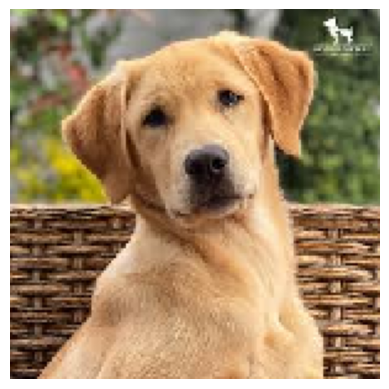

This image most likely belongs to elephant with a 53.98 percent confidence.

Options:
1. Upload an image for prediction
2. Exit

Please select an image file to upload...


<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


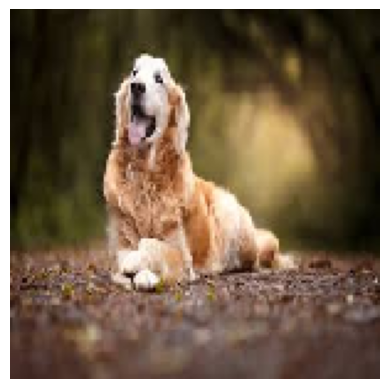

This image most likely belongs to dog with a 100.00 percent confidence.

Options:
1. Upload an image for prediction
2. Exit

Please select an image file to upload...


<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


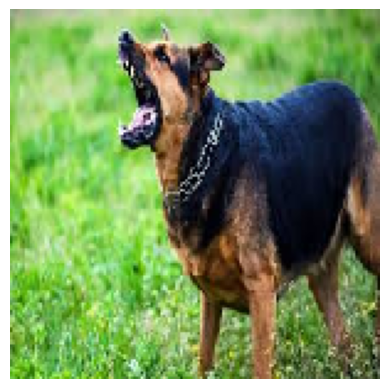

This image most likely belongs to dog with a 100.00 percent confidence.

Options:
1. Upload an image for prediction
2. Exit

Please select an image file to upload...


<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


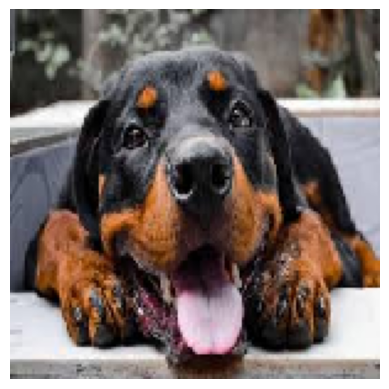

This image most likely belongs to dog with a 100.00 percent confidence.

Options:
1. Upload an image for prediction
2. Exit

Please select an image file to upload...


<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


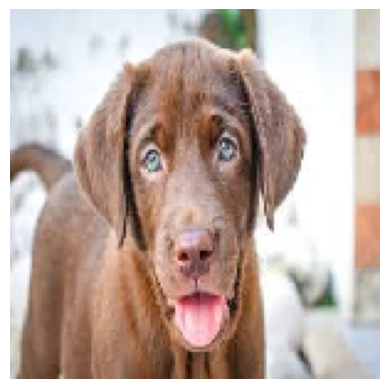

This image most likely belongs to dog with a 100.00 percent confidence.

Options:
1. Upload an image for prediction
2. Exit

Please select an image file to upload...


<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


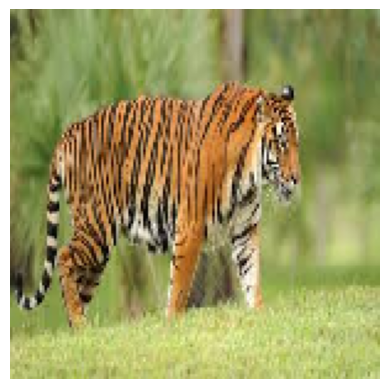

This image most likely belongs to tiger with a 96.02 percent confidence.

Options:
1. Upload an image for prediction
2. Exit

Please select an image file to upload...


<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


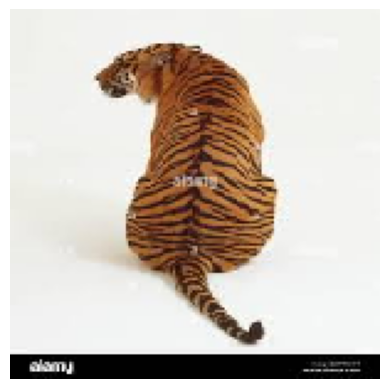

This image most likely belongs to tiger with a 100.00 percent confidence.

Options:
1. Upload an image for prediction
2. Exit

Please select an image file to upload...


<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


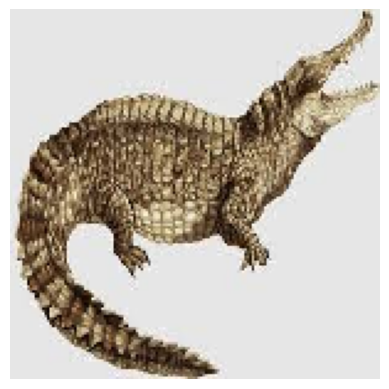

This image most likely belongs to crocodile with a 100.00 percent confidence.

Options:
1. Upload an image for prediction
2. Exit


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
from google.colab import files
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Function to upload a single image for prediction
def upload_image():
    display(Javascript('''
    async function upload() {
        const input = document.createElement('input');
        input.type = 'file';
        input.accept = 'image/*';

        return new Promise((resolve) => {
            input.onchange = (e) => {
                const file = e.target.files[0];
                const reader = new FileReader();
                reader.onload = (e) => {
                    resolve(e.target.result);
                };
                reader.readAsDataURL(file);
            };
            input.click();
        });
    }
    '''))
    data = eval_js('upload()')
    binary = b64decode(data.split(',')[1])
    filename = 'uploaded_image.jpg'
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# ====== UPLOAD TRAINING DATA ======
print("\n=== IMPORTANT ===")
print("Please compress your 'test' folder (with all subfolders) to 'test.zip'")
print("Then upload it when prompted below\n")

# Upload zip file
uploaded = files.upload()
zip_filename = next(iter(uploaded))

# Extract the zip file
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('/content/data')

# Set the data directory
data_dir = '/content/data/test'
batch_size = 10
img_height = 150
img_width = 150

# ====== LOAD DATASET ======
try:
    train_ds = image_dataset_from_directory(
        data_dir,
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size)

    val_ds = image_dataset_from_directory(
        data_dir,
        validation_split=0.2,
        subset="validation",
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size)

    # Get class names
    class_names = train_ds.class_names
    print("\nClass names detected:", class_names)
except Exception as e:
    print(f"\nError loading dataset: {e}")
    print("Please ensure:")
    print("1. You uploaded a zip file (not the raw folder)")
    print("2. The zip contains a 'test' folder with subfolders for each class")
    print("3. Each subfolder contains images of that class")
    raise

# ====== MODEL SETUP ======
# Configure dataset for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Create the model
num_classes = len(class_names)

model = keras.Sequential([
    layers.Rescaling(1./300),  # CHANGED: Removed .experimental
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

# ====== TRAINING ======
epochs = 20
print("\nStarting training...")
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Function to predict on a new image
def predict_image(img_path):
    img = keras.preprocessing.image.load_img(
        img_path, target_size=(img_height, img_width))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    plt.imshow(img)
    plt.axis('off')
    plt.show()

    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )

# ====== PREDICTION ======
print("\nModel training complete!")
print("Ready to make predictions on new images.")

while True:
    print("\nOptions:")
    print("1. Upload an image for prediction")
    print("2. Exit")
    choice = input("Enter your choice (1 or 2): ")

    if choice == '1':
        try:
            print("\nPlease select an image file to upload...")
            uploaded_file = upload_image()
            predict_image(uploaded_file)
        except Exception as e:
            print(f"Error: {e}. Please try again.")
    elif choice == '2':
        print("Exiting...")
        break
    else:
        print("Invalid choice. Please enter 1 or 2.")